# <center><font color=	DarkRed>Segmentez des clients d'un site e-commerce</font></center><br>
# <center><font color=	DarkRed>Analyse exploratoire du jeu de données</font></center><br>

<center>La société <font color=DarkBlue><b>Olist</b></font>,est une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne. </center>

<hr>

**<font color=DarkRed>La mission</font>** : 
En tant que Data Scientist Consultants d'Olist, **notre mission est de fournir à l'équipe e-commerce d'Olist une segmentation de la clientèle** pouvant être utilisée dans les activités de communication quotidiennes.

L'objectif de ce Notebook est de comprendre les différents profils des clients <font color=DarkBlue>**d'Olist**</font> à travers leurs comportements et leurs données personnelles. 

**Par conséquent, nous fournirons à l'équipe marketing** : 
- **une description actionnable de la segmentation** et de sa logique sous-jacente pour une utilisation optimale;
- **un contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps;
- **un code conforme aux conventions PEP8** pour qu'Olist puisse l'utiliser. 

Olist nous fournit une base de données commerciale anonymisée
[Lien](https://www.kaggle.com/olistbr/brazilian-ecommerce "base de données Olist") sur Kaggle avec des informations sur :
- les coordonnées des clients;
- l'historique des commandes;
- les produits achetés;
- les détails de paiement;
- les commentaires de satisfaction;
- etc.</center>   

<hr>

La première étape consiste en l'**importation des librairies <code>Python</code>** nécessaires à l'analyse dans le <code>**Jupyter Notebook**</code> : <br>
- <code>**NumPy**</code>, 
- <code>**Pandas**</code>, 
- <code>**Matplotlib**</code>, 
- <code>**Seaborn**</code>, 
- <code>**Missingno**</code>,
- <code>**Sklearn**</code>.

## Importation des librairies

In [1]:
# Manipulation des données
import numpy as np
import pandas as pd

import scipy.stats as st

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation des valeurs manquante
import missingno as msno

# Pour la gestion des alertes
import warnings 
from warnings import simplefilter
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

## Declaration des fonctions

In [ ]:
import fonction

# Chargement des données

In [4]:
customers = pd.read_csv("../data/data-olist/olist_customers_dataset.csv")
products = pd.read_csv("../data/data-olist/olist_products_dataset.csv")
orders = pd.read_csv("../data/data-olist/olist_orders_dataset.csv")
order_reviews = pd.read_csv("../data/data-olist/olist_order_reviews_dataset.csv")
order_payments = pd.read_csv("../data/data-olist/olist_order_payments_dataset.csv")
order_items = pd.read_csv("../data/data-olist/olist_order_items_dataset.csv")
geolocation = pd.read_csv("../data/data-olist/olist_geolocation_dataset.csv")
sellers = pd.read_csv("../data/data-olist/olist_sellers_dataset.csv")
translation = pd.read_csv("../data/data-olist/product_category_name_translation.csv")

In [5]:
dfs = {"customers": customers,
            "products" : products,
            "orders" : orders,
            "order_reviews" : order_reviews,
            "order_payments" : order_payments,
            "order_items" : order_items,
            "geolocation" : geolocation,
            "sellers" : sellers,
            "translation" : translation}

## <center><font color=darkRed>1. - Présentation générale du jeu de données</font></center>

In [6]:
for name, df in dfs.items():
    display(name, df.head(3))

'customers'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


'products'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


'orders'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


'order_reviews'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


'order_payments'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


'order_items'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


'geolocation'

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


'sellers'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


'translation'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


### <center><font color=darkRed>1.1 - Taille des jeux de données</font></center># 

In [7]:
for name, df in dfs.items():
    print("{} : {}".format(name, df.shape))

customers : (99441, 5)
products : (32951, 9)
orders : (99441, 8)
order_reviews : (99224, 7)
order_payments : (103886, 5)
order_items : (112650, 7)
geolocation : (1000163, 5)
sellers : (3095, 4)
translation : (71, 2)


In [8]:
for name, df in dfs.items():
    print(name, df.isna().sum().sum())

customers 0
products 2448
orders 4908
order_reviews 145903
order_payments 0
order_items 0
geolocation 0
sellers 0
translation 0


Il manque des valeurs seulement dans 'products', 'orders' et 'order_reviews'

### <center><font color=darkRed>1.2 - Visualisation des valeurs manquantes dans les datasets <code>**products**</code>, **<code>orders</code>** et **<code>order_reviews</code>**</font></center># 

In [9]:
fonction.missing_values_table(products)

Le Dataframe à 9 colonness.
Il y a 8 colonnes qui ont des valeurs manquantes.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0
product_length_cm,2,0.0
product_height_cm,2,0.0
product_width_cm,2,0.0


Les données manquantes correspondent à la catégorie de produits, de description, de nom et des photos.
La catégorie de produits est une information importante, on pourra éventuellement leur donner des attributs correspondant à leur caractère inconnu.

In [10]:
fonction.missing_values_table(orders)

Le Dataframe à 8 colonness.
Il y a 3 colonnes qui ont des valeurs manquantes.


,Missing Values,% of Total Values
order_delivered_customer_date,2965,3.0
order_delivered_carrier_date,1783,1.8
order_approved_at,160,0.2


Les données manquantes correspondent aux commandes qui posent problème.

In [11]:
fonction.missing_values_table(order_reviews)

Le Dataframe à 7 colonness.
Il y a 2 colonnes qui ont des valeurs manquantes.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


Les données manquantes correspondent à des commentaires vides.

### <center><font color=darkRed>1.3 - Doublons</font></center># 

In [12]:
for name, df in dfs.items():
    print(name, ':', df.duplicated().sum())

customers : 0
products : 0
orders : 0
order_reviews : 0
order_payments : 0
order_items : 0
geolocation : 261831
sellers : 0
translation : 0


### <center><font color=darkRed>1.4 -Types de données</font></center># 

In [13]:
liste_df = [customers, 
            products,
            orders,
            order_reviews,
            order_payments,
            order_items,
            geolocation,
            sellers,
            translation]

In [14]:
noms_df = ['customers', 
            'products',
            'orders',
            'order_reviews',
            'order_payments',
            'order_items',
            'geolocation',
            'sellers',
            'translation']

In [15]:
customers['customer_unique_id'].nunique()

96096

In [16]:
i=0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []
liste_nulles = []

for df in liste_df:

    for column in df.columns:
        liste_indices.append(noms_df[i])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
        liste_nulles.append(df[column].isna().sum(axis=0))
    i+=1
resume_data = pd.DataFrame([liste_indices, 
                            liste_colonnes, 
                            liste_types, 
                            liste_uniques,
                            liste_nulles]
                          ).T
resume_data.columns=['Donnees', 'Nom colonne', 'Type', 'valeurs uniques', 'valeurs nulles']
resume_data

,Donnees,Nom colonne,Type,valeurs uniques,valeurs nulles
0,customers,customer_id,object,99441,0
1,customers,customer_unique_id,object,96096,0
2,customers,customer_zip_code_prefix,int64,14994,0
3,customers,customer_city,object,4119,0
4,customers,customer_state,object,27,0
5,products,product_id,object,32951,0
6,products,product_category_name,object,73,610
7,products,product_name_lenght,float64,66,610
8,products,product_description_lenght,float64,2960,610
9,products,product_photos_qty,float64,19,610


### <center><font color=darkRed>1.5 - Observation</font></center>

<font color=darkBlue>**- Customers :**</font> Ensemble de données client

Cet ensemble de données contient des informations sur le client et son emplacement.

*Utile pour identifier les clients uniques dans l'ensemble de données des commandes et pour trouver le lieu de livraison des commandes.*

Chaque commande est attribuée à un **identifiant client unique**. Cela signifie que le même client obtiendra des identifiants différents pour différentes commandes. 

Le but d'avoir un client **<code>unique_id</code>** sur l'ensemble de données est de permettre d'identifier les clients qui ont effectué des rachats en magasin. Sinon, nous constatons que chaque commande est associée à un client différent.

***- Observation :***

- il y a plus de **<code>customer_unique_id</code>** que de **<code>customer_id</code>**
- **<code>customer_state</code>** pourrait être catégorisé

<font color=darkBlue>**- Products :**</font>

Cet ensemble de données comprend des données sur les produits vendus par Olist.

- Observation :
- Il y a 74 catégories différentes.

<font color=darkBlue>**- Orders :**</font>

Il s'agit du jeu de données principal.

***- Observation :***
- **<code>order_purchase_timestamp</code>** : à mettre en format date
- **<code>order_approved_at</code>** : à mettre en format date
- **<code>order_delivered_carrier_date</code>** : à mettre en format date
- **<code>order_delivered_customer_date</code>** : à mettre en format date
- **<code>order_estimated_delivery_date</code>** : à mettre en format date

<font color=darkBlue>**- Order_reviews :**</font>

Cet ensemble de données comprend des données sur les avis effectués par les clients.

Une fois qu'un client achète le produit sur Olist Store, un vendeur est averti afin de traiter la commande. 
Une fois que le client reçoit le produit ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail dans laquelle il peut donner une note pour l'expérience d'achat et écrire quelques commentaires.

***- Observation :***
- **<code>review_creation_date</code>** : à mettre en format date
- **<code>review_answer_timestamp</code>** : à mettre en format date

<font color=darkBlue>**- Order_payments :**</font>

Cet ensemble de données comprend des données sur les options de paiement des commandes.

- Observation :
- **<code>order_id</code>** contient autant de valeurs que dans order
- **<code>payment_sequential</code>** et **<code>payment_type</code>** pourraient être catégorisés

<font color=darkBlue>**- Order_items :**</font>

Cet ensemble de données comprend des données sur les articles achetés dans chaque commande.

- Observation :
- **<code>order_item_id</code>**  contient 21 types différents
- **<code>shipping_limit_date</code>**  : à mettre en format date

<font color=darkBlue>**- Geolocation :**</font>

Cet ensemble de données contient des informations sur les codes postaux brésiliens et ses coordonnées latitude / longitude. 
Utile pour tracer des cartes et trouver les distances entre les vendeurs et les clients.

***- Observation :***
- **<code>geolocation_state</code>**  pourrait être catégorisé

<font color=darkBlue>**- Sellers :**</font>

Cet ensemble de données comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist. 
Utile pour trouver l'emplacement du vendeur et pour identifier le vendeur qui a livré chaque produit.


<font color=darkBlue>**- Translation :**</font>

Cet ensemble de données contient les traductions des catégories de produit.

***- Observation :***
- 3 catégories non traduites : la_cuisine, cds_dvs_musicals, dvds_blu_ray

## <center><font color=darkRed>2 - Nettoyage et analyse exploratoire</font></center>

## <center><font color=darkRed>2.1 - Traitement des valeurs manquantes</font></center>

Pour les données catégorielle, je vais remplacer les valeurs manquantes par des valeurs vides et par 'Unkwown' pour la catégorie de produit.

Pour les données quantitatives, je vais remplacer les valeurs manquantes par des 0.

In [17]:
geolocation.drop_duplicates(inplace=True)
# Remplacer par des valeurs vides
order_reviews['review_comment_title'].fillna(' ',inplace=True)
order_reviews['review_comment_message'].fillna(' ',inplace=True)
products['product_category_name'].fillna('Unkwown',inplace=True)
    
# Remplacer par des 0
orders['order_approved_at'].fillna(-1, inplace=True)
orders['order_delivered_carrier_date'].fillna(0, inplace=True)
orders['order_delivered_customer_date'].fillna(0, inplace=True)

products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)
products['product_weight_g'].fillna(0, inplace=True)
products['product_length_cm'].fillna(0, inplace=True)
products['product_height_cm'].fillna(0, inplace=True)
products['product_width_cm'].fillna(0, inplace=True)
    

Création d'un dictionnaire de catégorie

Afin de réduire le nombre de catégories (73 valeurs uniques), je vais les regrouper par grandes catégories afin de caractériser facilement les profils de client.

In [18]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [19]:
dict_categories = {
#home (maison)
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#appliances(appareils électroménagers)
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
    
#office(bureau)
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
#sports_leisure(sport de loisir)
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',
#arts
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
#fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
#health_beauty (Santé & Beauté)
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
#garden and pets (animaux domestiques)
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks (boissons alimentaires)
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
#other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

# Creation of new variable
translation['main_category'] = translation['product_category_name_english'].map(dict_categories)

In [20]:
translation.head(5)

,product_category_name,product_category_name_english,main_category
0,beleza_saude,health_beauty,health_beauty
1,informatica_acessorios,computers_accessories,electronics
2,automotivo,auto,auto
3,cama_mesa_banho,bed_bath_table,home
4,moveis_decoracao,furniture_decor,home


## <center><font color=darkRed>2.2 - Analyse exploratoire achat</font></center>

#### <center><font color=darkBlue>2.2.1 - Traduction des categories de produits</font></center>

In [21]:
products_translation = pd.merge(translation, products,
                               how='right', 
                               left_on='product_category_name', 
                               right_on='product_category_name'
                              ).groupby(
        'product_id').max()[['product_category_name_english']]

#products_translation.columns = ['product_id', 'product_category_name_translation']
#products_translation.set_index('product_id', inplace=True)

In [22]:
products_translation

,product_category_name_english
product_id,
00066f42aeeb9f3007548bb9d3f33c38,perfumery
00088930e925c41fd95ebfe695fd2655,auto
0009406fd7479715e4bef61dd91f2462,bed_bath_table
000b8f95fcb9e0096488278317764d19,housewares
000d9be29b5207b54e86aa1b1ac54872,watches_gifts
...,...
fff6177642830a9a94a0f2cba5e476d1,cool_stuff
fff81cc3158d2725c0655ab9ba0f712c,health_beauty
fff9553ac224cec9d15d49f5a263411f,fashion_bags_accessories


#### <center><font color=darkBlue>2.2.2 - Nombre de commande par jour, mois, heure</font></center>

In [23]:
orders.groupby(by="order_status").sum()["order_id"]

order_status
approved       a2e4c44360b4a57bdff22f3a4630c173132f1e724165a0...
canceled       1b9ecfe83cdc259250e1a8aca174f0ad714fb133a6730a...
created        b5359909123fa03c50bdb0cfed07f098dba5062fbda3af...
delivered      e481f51cbdc54678b7cc49136f2d6af753cdb2fc8bc7dc...
invoiced       136cce7faa42fdb2cefd53fdc79a60980760a852e4e9d8...
processing     15bed8e2fec7fdbadb186b57c46c92f2d3c8851a6651ee...
shipped        ee64d42b8cf066f35eac1cf57de1aa856942b8da583c2f...
unavailable    8e24261a7e58791d10cb1bf9da94df5cc272bcd21c2874...
Name: order_id, dtype: object

Je conserve seulement les lignes **"delivered".**

In [24]:
orders = orders[orders["order_status"] == "delivered"]

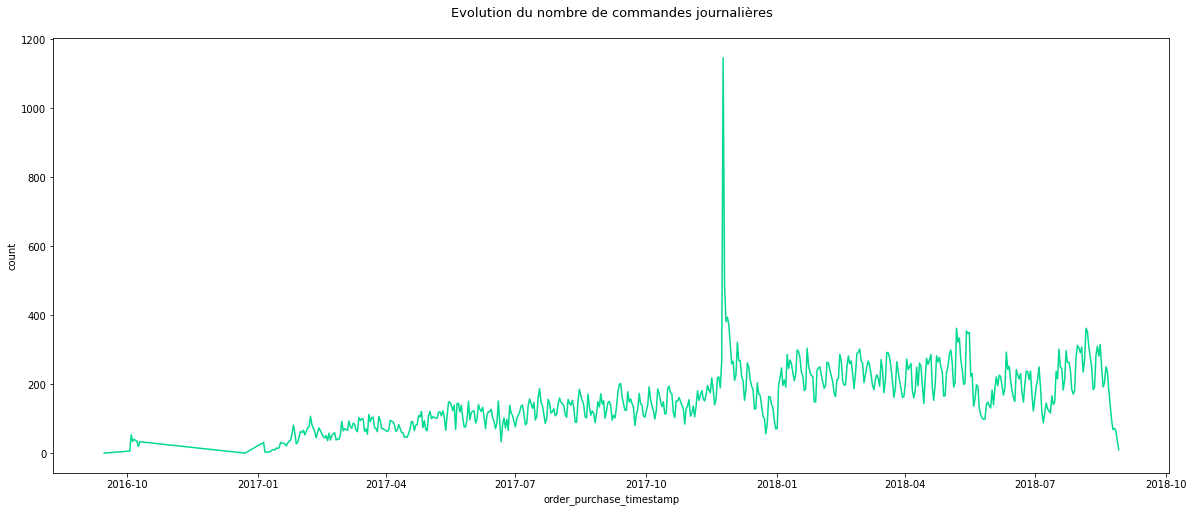

In [25]:
orders_per_days = orders.groupby(orders["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution du nombre de commandes journalières\n",
          fontsize=13)
plt.show()

Je regarde les différents statuts de commande pour ne **conserver que les commandes qui ne sont pas "en cours".**

In [26]:
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    orders[col] = orders[col].astype('datetime64[ns]')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96478 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96478 non-null  object        
 1   customer_id                    96478 non-null  object        
 2   order_status                   96478 non-null  object        
 3   order_purchase_timestamp       96478 non-null  datetime64[ns]
 4   order_approved_at              96478 non-null  object        
 5   order_delivered_carrier_date   96478 non-null  object        
 6   order_delivered_customer_date  96478 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96478 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.6+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


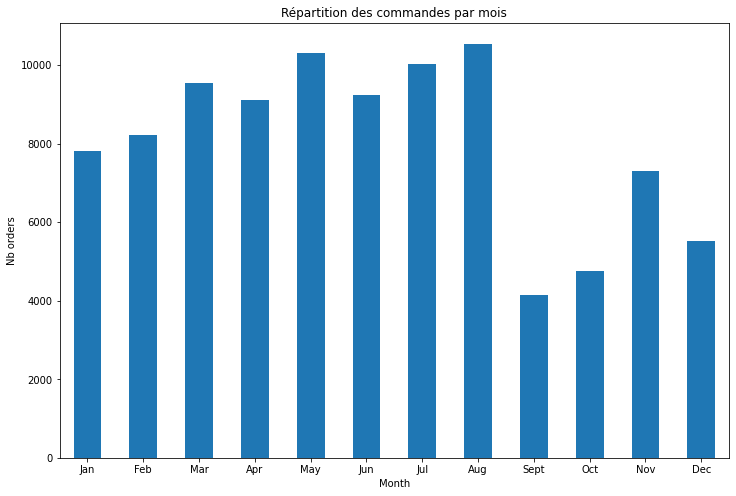

In [27]:
orders.groupby(orders['order_purchase_timestamp'].dt.month)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par mois",
          ylabel="Nb orders",
          xlabel="Month",
          legend=False)
plt.xticks(np.arange(0,12), ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sept','Oct','Nov','Dec'], 
           rotation='horizontal')
plt.show()

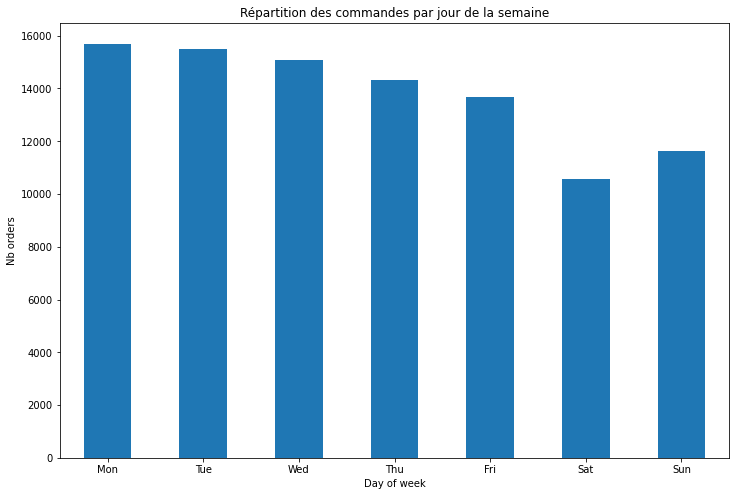

In [28]:
orders.groupby(orders['order_purchase_timestamp'].dt.dayofweek)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par jour de la semaine",
          ylabel="Nb orders",
          xlabel="Day of week",
          legend=False)
plt.xticks(np.arange(0,7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation='horizontal')
plt.show()

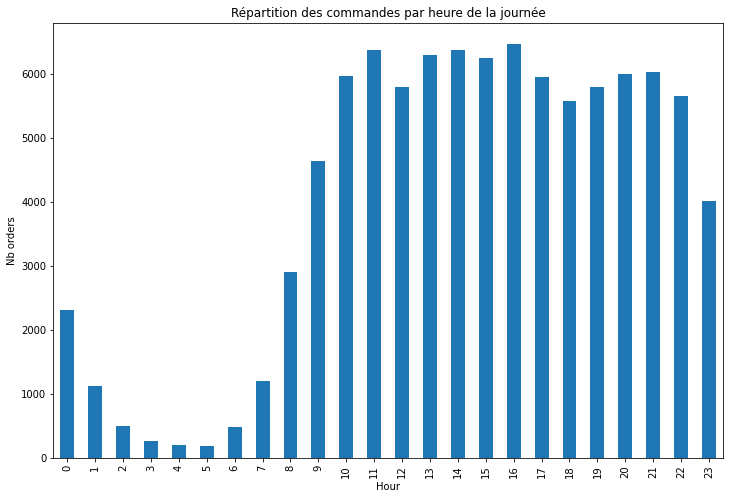

In [29]:
orders.groupby(orders['order_purchase_timestamp'].dt.hour)\
    .agg({"order_id": "nunique"})\
    .plot(figsize=(12,8), kind="bar",
          title="Répartition des commandes par heure de la journée",
          ylabel="Nb orders",
          xlabel="Hour",
          legend=False)
plt.show()

#### <center><font color=darkBlue>2.2.2 - Nombre d'achats total par client</font></center>

In [30]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [31]:
order_items['product_id'].count()

112650

In [32]:
#Nombre d'achats total par client
produits_par_client = pd.merge(customers, 
                               pd.merge(order_items, 
                                        orders))
    
nb_produits_total = produits_par_client.groupby('customer_id')['product_id'].count()
nb_produits_total.rename('Nb_pdts', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffcb937e9dd47a13f05ecb8290f4d3e    1
fffecc9f79fd8c764f843e9951b11341    1
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
Name: Nb_pdts, Length: 96478, dtype: int64

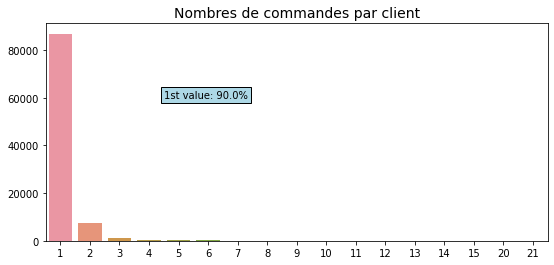

In [33]:
plt.figure(figsize=(9, 4))

#var = nb_produits_total.Nb_pdts
sns.barplot(x=nb_produits_total.value_counts().index,
            y=nb_produits_total.value_counts().values)
text_str = (
    '1st value: {}%'.format(
        round((nb_produits_total.value_counts(
            normalize=True) * 100).nlargest(1).sum(), 0)))
plt.text(3.5, 60000, text_str,
         bbox=dict(boxstyle='square, pad=0.3',
                   fc='lightblue'))
plt.ylabel('')
plt.xlabel('')
plt.title('Nombres de commandes par client', fontsize=14)
plt.show()

#### <center><font color=darkBlue>2.2.3 - Catégories de produits les plus achetées (top 10)</font></center>

Text(0, 0.5, 'Categorie de produits')

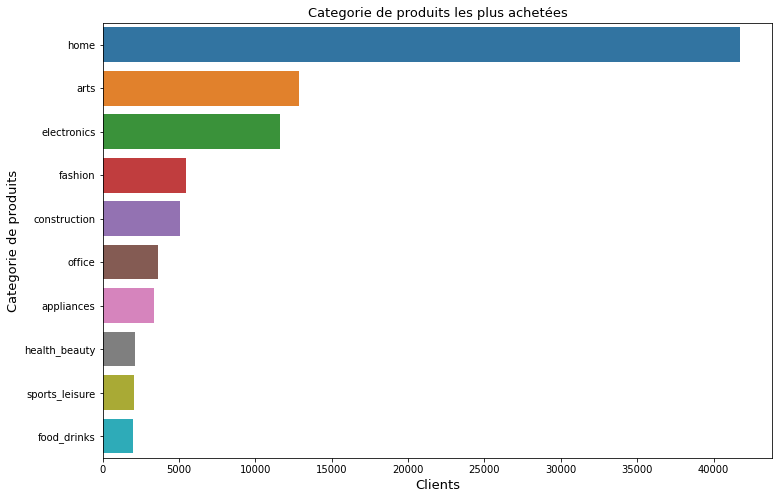

In [34]:
plt.figure(figsize=[12, 8])
sns.barplot(y=translation['main_category'].value_counts().head(10).index,
            x=customers['customer_state'].value_counts().head(10).values)
plt.title('Categorie de produits les plus achetées', fontsize=13)
plt.xlabel('Clients', fontsize=13)
plt.ylabel('Categorie de produits', fontsize=13)

In [35]:
products_translation = pd.merge(products, translation).drop(
        ['product_category_name'], axis=1)

In [36]:
#Catégorie la plus achetée
cat = pd.merge(produits_par_client, products_translation).sort_values(
        ['customer_id','product_category_name_english'], ascending=False).groupby(
        ['customer_id','product_category_name_english']).head(1)[[
        'customer_unique_id', 'product_category_name_english']]
cat.columns = ['customer_unique_id', 'categorie_la_plus_achetee']
cat['categorie_la_plus_achetee'] = cat['categorie_la_plus_achetee'].map(dict_categories) 

cat.set_index('customer_unique_id', inplace=True)
cat

,categorie_la_plus_achetee
customer_unique_id,
48fd7dec70f2b104a1d5e8c5c639102b,home
680213db6ebd9e4f24d03280cbe10346,home
afbb5a642107cf6bb1ca68e863175f03,electronics
e5794df8573fa179a90a7b797fc4b71f,home
bb438f958261edabbe96fc22622499c4,arts
...,...
0b83f73b19c2019e182fd552c048a22c,home
4893ad4ea28b2c5b3ddf4e82e79db9e6,other
94b11d37cd61cb2994a194d11f89682b,health_beauty


Text(0.5, 1.0, 'Catégorie de produit les plus achetées(pourcentage)')

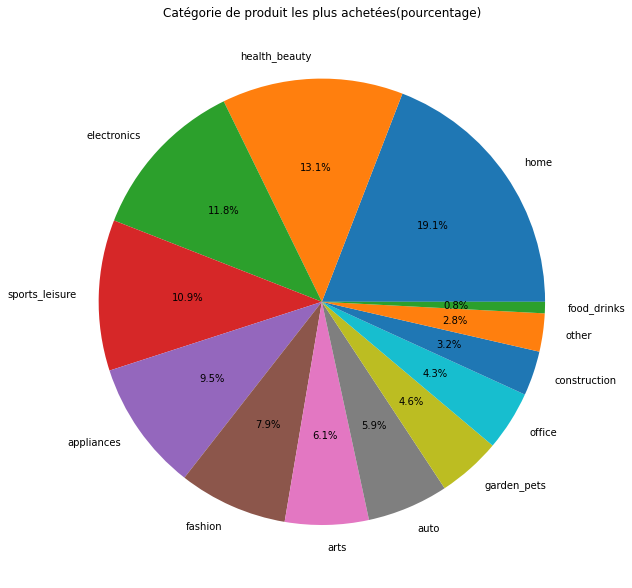

In [37]:
cat_order = products_translation['main_category'].value_counts()

plt.figure(figsize=[10,30])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
cat_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Catégorie de produit les plus achetées(pourcentage)')

#### <center><font color=darkBlue>2.2.4 - CA par mois et montant moyen des achats</font></center>

In [ ]:
order_items["sale_month"] = orders['order_purchase_timestamp'].dt.month
fig = plt.figure(figsize=(12,8))
sns.boxplot(data=order_items[order_items.price < 500], x="sale_month", y="price")
plt.title("Distribution du C.A. sur les mois de l'année", fontsize=18, color="b")
plt.show()

In [38]:
achats_moy = pd.merge(order_items, orders).groupby(['customer_id', 'order_id'])['price'].sum().groupby(['customer_id']).mean()
achats_moy = pd.merge(achats_moy,customers[['customer_unique_id','customer_id']], 
                               how='left', 
                               left_on='customer_id', 
                               right_on='customer_id'
                              )
achats_moy.set_index('customer_unique_id', inplace=True)
achats_moy = achats_moy.drop(['customer_id'], axis=1)
achats_moy = achats_moy.rename(columns={"price": "Total_moyen_achats"})


In [39]:
achats_moy.head()

,Total_moyen_achats
customer_unique_id,
248ffe10d632bebe4f7267f1f44844c9,89.80
b0015e09bb4b6e47c52844fab5fb6638,54.90
94b11d37cd61cb2994a194d11f89682b,179.99
4893ad4ea28b2c5b3ddf4e82e79db9e6,149.90
0b83f73b19c2019e182fd552c048a22c,93.00


Text(0.5, 1.0, 'Montant moyen des achats(pourcentage)')

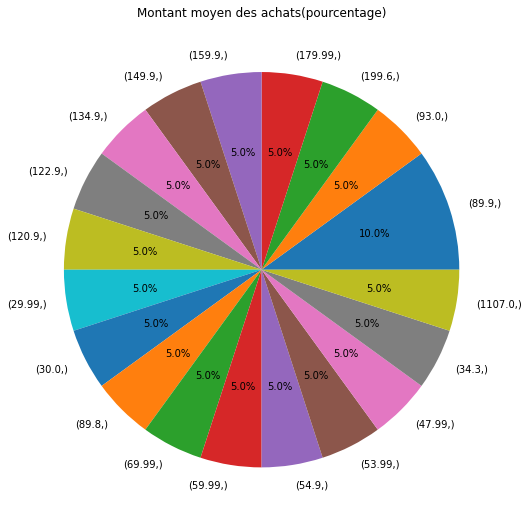

In [40]:
achat = achats_moy.head(20)
achat_order = achat.value_counts()

plt.figure(figsize=[10,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
achat_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Montant moyen des achats(pourcentage)')

#### <center><font color=darkBlue>2.2.5 - Nombre moyen de produits par commande</font></center>

In [41]:
nb_moyen_prod = pd.merge(order_items, orders).groupby(['customer_id', 'order_id'])['price'].count().groupby(['customer_id']).mean()
nb_moyen_prod = pd.merge(nb_moyen_prod,customers[['customer_unique_id','customer_id']], 
                               how='left', 
                               left_on='customer_id', 
                               right_on='customer_id'
                              )
nb_moyen_prod.set_index('customer_unique_id', inplace=True)
nb_moyen_prod = nb_moyen_prod.drop(['customer_id'], axis=1)
nb_moyen_prod = nb_moyen_prod.rename(columns={"price": "Nb_moyen_produits_par_commandes"})


Text(0.5, 1.0, 'Nombre moyen de produits par commande(pourcentage)')

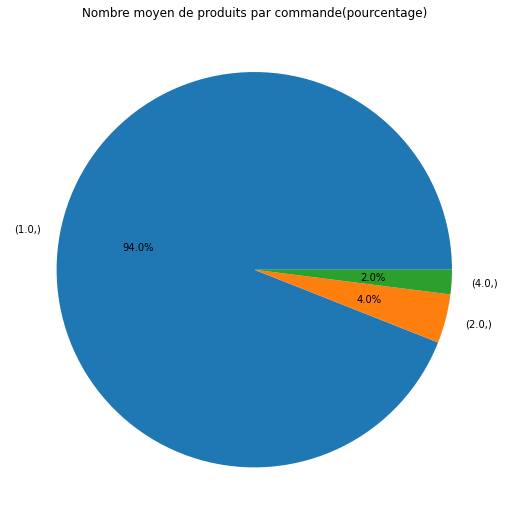

In [42]:
nb_produits= nb_moyen_prod.head(50)
nb_produits_order = nb_produits.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
nb_produits_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Nombre moyen de produits par commande(pourcentage)')

#### <center><font color=darkBlue>2.2.6 - Délai moyen de livraison</font></center>

In [43]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].astype('datetime64')
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype('datetime64')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce',format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce',format='%Y-%m-%d %H:%M:%S')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce',format='%Y-%m-%d %H:%M:%S')
orders['order_estimated_delivery_date'] = orders['order_estimated_delivery_date'].astype('datetime64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [44]:
delai_livraison = pd.merge(orders, order_items)
delai_livraison.set_index('customer_id', inplace=True)
delai_livraison['Delai_Moyen_livraison'] = delai_livraison['order_delivered_customer_date'] - delai_livraison['order_purchase_timestamp']
delai_livraison = delai_livraison['Delai_Moyen_livraison'].dt.days +1
delai_livraison = pd.merge(delai_livraison,customers[['customer_unique_id','customer_id']], 
                               how='left', 
                               left_on='customer_id', 
                               right_on='customer_id'
                              )
delai_livraison.set_index('customer_unique_id', inplace=True)
delai_livraison = delai_livraison.drop(['customer_id'], axis=1)
delai_livraison

,Delai_Moyen_livraison
customer_unique_id,
7c396fd4830fd04220f754e42b4e5bff,9
af07308b275d755c9edb36a90c618231,14
3a653a41f6f9fc3d2a113cf8398680e8,10
7c142cf63193a1473d2e66489a9ae977,14
72632f0f9dd73dfee390c9b22eb56dd6,3
...,...
da62f9e57a76d978d02ab5362c509660,23
737520a9aad80b3fbbdad19b66b37b30,25
5097a5312c8b157bb7be58ae360ef43c,18


Text(0.5, 1.0, 'Délai moyen de livraison en jour(pourcentage)')

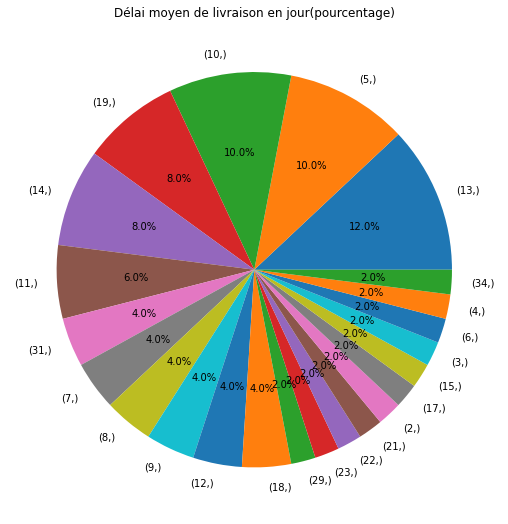

In [45]:
del_livraison= delai_livraison.head(50)
delai_livraison_order = del_livraison.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
delai_livraison_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Délai moyen de livraison en jour(pourcentage)')

#### <center><font color=darkBlue>2.2.7 - Moyen de paiement le plus utilisé</font></center>

In [46]:
#moyen de paiement le plus utilisé
paiement = pd.merge(orders, order_payments).sort_values(
        ['customer_id','payment_type','payment_installments'],ascending=False).groupby(
        ['customer_id', 'payment_type','payment_installments']).head(1)[[
        'customer_id', 'payment_type','payment_installments']]

paiement = pd.merge(paiement, customers)[['customer_unique_id', 'customer_id','payment_type', 'payment_installments']].groupby(['customer_id']).max()

paiement.columns = ['customer_unique_id', 'Moy_Paiment','Facilités']
paiement.set_index('customer_unique_id', inplace=True)

Text(0.5, 1.0, 'Distribution des types de paiements (pourcentage)')

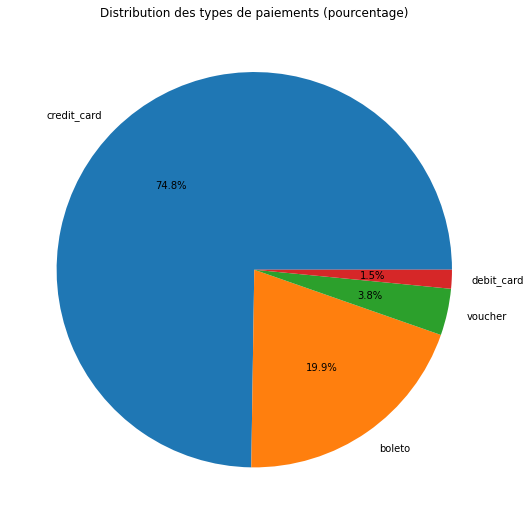

In [47]:
type_paiement = paiement["Moy_Paiment"]
paiement_order = type_paiement.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
paiement_order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Distribution des types de paiements (pourcentage)')

#### <center><font color=darkBlue>2.2.8 - Note moyenne des commentaires</font></center>
    

In [48]:
note_moyenne = pd.merge(order_reviews, orders).groupby('customer_id')['review_score'].mean()
note_moyenne = pd.merge(note_moyenne,customers[['customer_unique_id','customer_id']], 
                               how='left', 
                               left_on='customer_id', 
                               right_on='customer_id'
                              )

note_moyenne.set_index('customer_unique_id', inplace=True)
note_moyenne = note_moyenne.drop(['customer_id'], axis=1)
note_moyenne = note_moyenne.rename(columns={"review_score": "Note_Moyenne_Commentaire"})

Text(0.5, 1.0, 'Distribution des commentaires (pourcentage)')

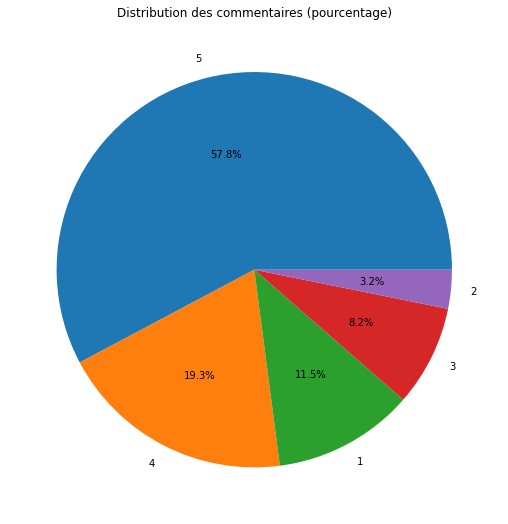

In [49]:
not_comm = order_reviews["review_score"]
order = not_comm.value_counts()

plt.figure(figsize=[15,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
order.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Distribution des commentaires (pourcentage)')

#### <center><font color=darkBlue>2.2.9 - Heure et jour du dernier achat</font></center>
    


In [50]:

# Convert to date format, rename feature
orders['order_purchase_timestamp'] = (
    pd.to_datetime(orders['order_purchase_timestamp'],
                   format='%Y-%m-%d'))
orders = (orders.rename(
    columns={'order_purchase_timestamp':'date_achat'}))

# Create new features
# https://strftime.org/
orders['annee_mois'] = (
    orders.date_achat.apply(lambda x: x.strftime('%Y%m')))
orders['mois_achat'] = (
    orders.date_achat.apply(lambda x: x.strftime('%m')))
orders['heure_achat'] = (
    orders.date_achat.apply(lambda x: x.hour))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
orders

,order_id,customer_id,order_status,date_achat,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,annee_mois,mois_achat,heure_achat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,201710,10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,201807,07,20
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,201808,08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,201711,11,19
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,201802,02,21
...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,201703,03,9
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,201802,02,12
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,201708,08,14
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,201801,01,21


In [52]:
# Create new features
hours_bins = [-0.1, 6, 11, 14, 18, 21, 24]
hours_label = ['0-6h', '6-11h', '11h-14h', '14-18h', '18-21h', '21-24h']
orders['horaire_achat'] = pd.cut(orders['heure_achat'],
                                         hours_bins,
                                         labels=hours_label).astype(object)

In [53]:
orders.head(5)

,order_id,customer_id,order_status,date_achat,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,annee_mois,mois_achat,heure_achat,horaire_achat
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,201710,10,10,6-11h
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,201807,07,20,18-21h
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,201808,08,8,6-11h
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,201711,11,19,18-21h
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,201802,02,21,18-21h


In [54]:
temp_achat = pd.merge(order_items, orders)[[
        'customer_id', 'horaire_achat', 'date_achat', 'annee_mois', 'mois_achat', 'heure_achat']].groupby(['customer_id']).max()
temp_achat = pd.merge(temp_achat,customers[['customer_unique_id','customer_id']], 
                               how='left', 
                               left_on='customer_id', 
                               right_on='customer_id'
                              )

temp_achat.set_index('customer_unique_id', inplace=True)
temp_achat = temp_achat.drop(['customer_id'], axis=1)

Text(0.5, 1.0, 'Heure moyenne des achats(pourcentage)')

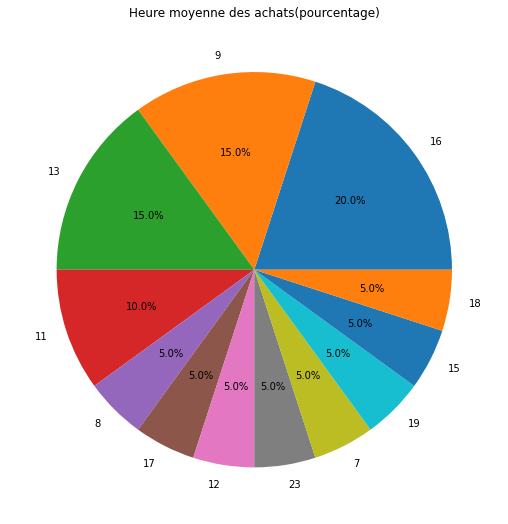

In [55]:
heure_achat = temp_achat['heure_achat'].head(20)
achat_hour = heure_achat.value_counts()

plt.figure(figsize=[10,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
achat_hour.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Heure moyenne des achats(pourcentage)')

Text(0.5, 1.0, 'Mois moyen des achats(pourcentage)')

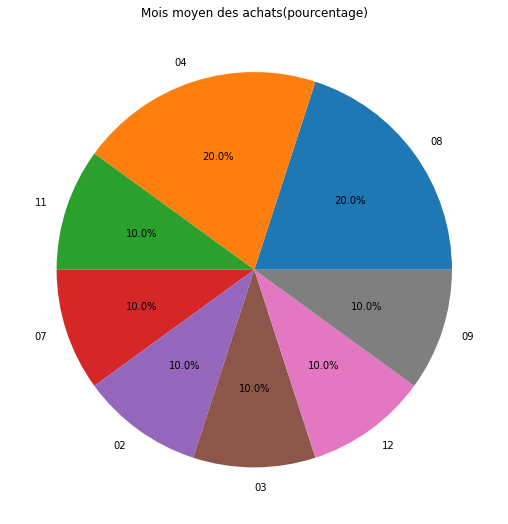

In [56]:
#temp_achat.purchase_time.apply(lambda x: x.strftime('%m'))
mois_achat = temp_achat['mois_achat'].head(10)
achat_month = mois_achat.value_counts()

plt.figure(figsize=[10,20])
plt.subplot(2, 1, 1) # subplot(nrows, ncol, index)
achat_month.plot.pie(autopct='%1.1f%%')
plt.ylabel('')

plt.title('Mois moyen des achats(pourcentage)')

#### <center><font color=darkBlue>2.2.10 - Tarif livraison</font></center>

In [57]:
tarif_fret = pd.merge(order_items, orders)[[
    'customer_id', 'freight_value']].groupby(['customer_id']).max()
tarif_fret = pd.merge(tarif_fret,customers[['customer_unique_id','customer_id']], 
                               how='left', 
                               left_on='customer_id', 
                               right_on='customer_id'
                              )

tarif_fret.set_index('customer_unique_id', inplace=True)
tarif_fret = tarif_fret.drop(['customer_id'], axis=1)
tarif_fret = tarif_fret.rename(columns={"freight_value": "Frais_de_port"})

In [58]:
tarif_fret

,Frais_de_port
customer_unique_id,
248ffe10d632bebe4f7267f1f44844c9,24.94
b0015e09bb4b6e47c52844fab5fb6638,12.51
94b11d37cd61cb2994a194d11f89682b,15.43
4893ad4ea28b2c5b3ddf4e82e79db9e6,29.45
0b83f73b19c2019e182fd552c048a22c,14.01
...,...
bb438f958261edabbe96fc22622499c4,13.91
e5794df8573fa179a90a7b797fc4b71f,26.46
afbb5a642107cf6bb1ca68e863175f03,15.23


#### <center><font color=darkBlue>2.2.11 - Données de géolocalisation</font></center>

In [59]:
geol = pd.merge(customers,geolocation, 
                               how='left', 
                               left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix'
                              ).groupby(
        'customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']]
                                    

In [60]:
geol

,geolocation_lat,geolocation_lng
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,-23.340262,-46.831085
0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559044,-46.788516
0000f46a3911fa3c0805444483337064,-27.543010,-48.634938
0000f6ccb0745a6a4b88665a16c9f078,-1.312726,-48.482748
0004aac84e0df4da2b147fca70cf8255,-23.505588,-47.469820
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,-8.362654,-36.562103
fffea47cd6d3cc0a88bd621562a9d061,-12.217900,-38.959237
ffff371b4d645b6ecea244b27531430a,-11.834705,-55.508145


#### <center><font color=darkBlue>2.2.12 - Données sur les villes et région</font></center>

In [61]:
customers_localisation = pd.merge(customers,geolocation, 
                               how='right', 
                               left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix'
                              ).groupby(
        'customer_unique_id').max()[['customer_city', 'customer_state']]

In [62]:
customers_localisation

,customer_city,customer_state
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP
0000f46a3911fa3c0805444483337064,sao jose,SC
0000f6ccb0745a6a4b88665a16c9f078,belem,PA
0004aac84e0df4da2b147fca70cf8255,sorocaba,SP
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA
ffff371b4d645b6ecea244b27531430a,sinop,MT


#### <center><font color=darkBlue>2.2.13 - Création du nouveau dataframe</font></center>

In [63]:
#nb_produits.reset_index(drop=True, inplace=True)
cat.reset_index(inplace=True)
achats_moy.reset_index(inplace=True, )
nb_moyen_prod.reset_index(inplace=True)
delai_livraison.reset_index(inplace=True)
paiement.reset_index(inplace=True)
note_moyenne.reset_index(inplace=True)
temp_achat.reset_index(inplace=True)
geol.reset_index(inplace=True)
customers_localisation.reset_index(inplace=True)
tarif_fret.reset_index(inplace=True)


In [65]:
df_1 = fonction.merge_fct(cat,achats_moy,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_2 = fonction.merge_fct(nb_moyen_prod,df_1,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_3 = fonction.merge_fct(delai_livraison,df_2,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_4 = fonction.merge_fct(paiement,df_3,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_5 = fonction.merge_fct(note_moyenne,df_4,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_6 = fonction.merge_fct(temp_achat,df_5,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_7 = fonction.merge_fct(tarif_fret,df_6,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_8 = fonction.merge_fct(geol,df_7,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

df_9 = fonction.merge_fct(customers_localisation,df_8,"customer_unique_id","customer_unique_id").groupby('customer_unique_id').max()

final_data = df_9.dropna()

In [66]:
final_data['categorie_la_plus_achetee'].fillna('Unknown', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [67]:
final_data

,customer_city,customer_state,geolocation_lat,geolocation_lng,Frais_de_port,horaire_achat,date_achat,annee_mois,mois_achat,heure_achat,Note_Moyenne_Commentaire,Moy_Paiment,Facilités,Delai_Moyen_livraison,Nb_moyen_produits_par_commandes,categorie_la_plus_achetee,Total_moyen_achats
customer_unique_id,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,cajamar,SP,-23.340262,-46.831085,12.00,6-11h,2018-05-10 10:56:27,201805,05,10.0,5.0,credit_card,8.0,7.0,1.0,home,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,SP,-23.559044,-46.788516,8.29,6-11h,2018-05-07 11:11:27,201805,05,11.0,4.0,credit_card,1.0,4.0,1.0,health_beauty,18.90
0000f46a3911fa3c0805444483337064,sao jose,SC,-27.543010,-48.634938,17.22,18-21h,2017-03-10 21:05:03,201703,03,21.0,3.0,credit_card,8.0,26.0,1.0,office,69.00
0000f6ccb0745a6a4b88665a16c9f078,belem,PA,-1.312726,-48.482748,17.63,18-21h,2017-10-12 20:29:41,201710,10,20.0,4.0,credit_card,4.0,21.0,1.0,electronics,25.99
0004aac84e0df4da2b147fca70cf8255,sorocaba,SP,-23.505588,-47.469820,16.89,18-21h,2017-11-14 19:45:42,201711,11,19.0,5.0,credit_card,6.0,14.0,1.0,electronics,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,PE,-8.362654,-36.562103,258.28,18-21h,2017-06-08 21:00:36,201706,06,21.0,5.0,credit_card,10.0,28.0,2.0,health_beauty,1570.00
fffea47cd6d3cc0a88bd621562a9d061,feira de santana,BA,-12.217900,-38.959237,19.69,18-21h,2017-12-10 20:07:56,201712,12,20.0,4.0,credit_card,1.0,31.0,1.0,health_beauty,64.89
ffff371b4d645b6ecea244b27531430a,sinop,MT,-11.834705,-55.508145,22.56,14-18h,2017-02-07 15:49:16,201702,02,15.0,5.0,credit_card,1.0,15.0,1.0,auto,89.90


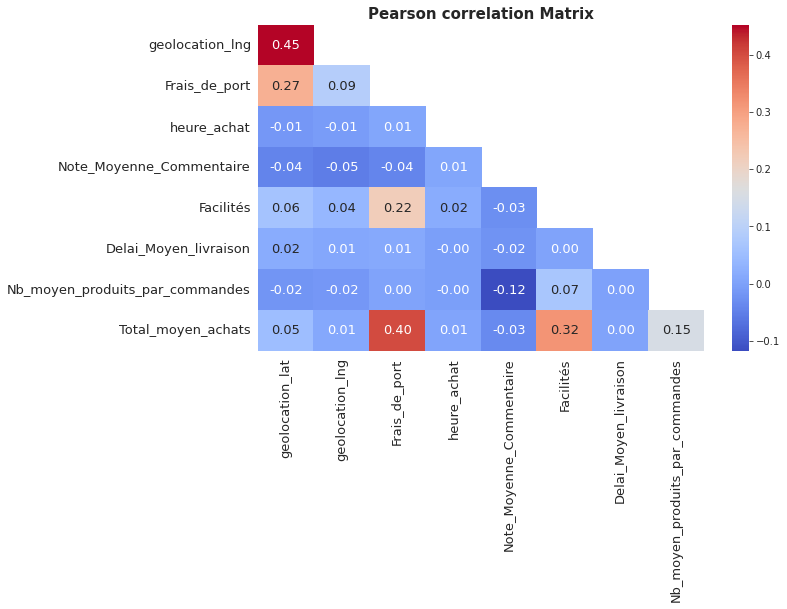

In [68]:
# Call function to plot correlation heatmap
fonction.pearson_corr_heatmap(final_data, mask_upper=True,
                     figsize=(10, 6),
                     font=13, cmap='coolwarm')

## <center><font color=darkRed>2.4 - Traitement des Outliers</font></center>

### <center><font color=darkBlue>2.4.1 - Traitement des Outliers</font></center>

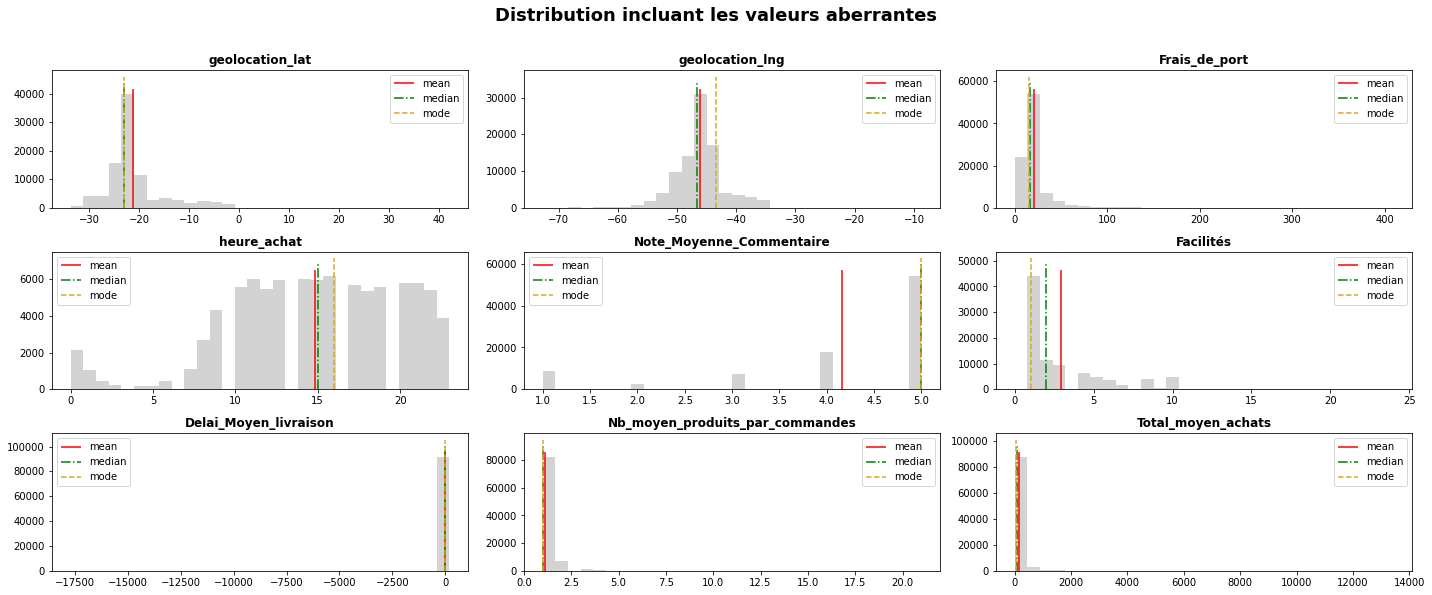

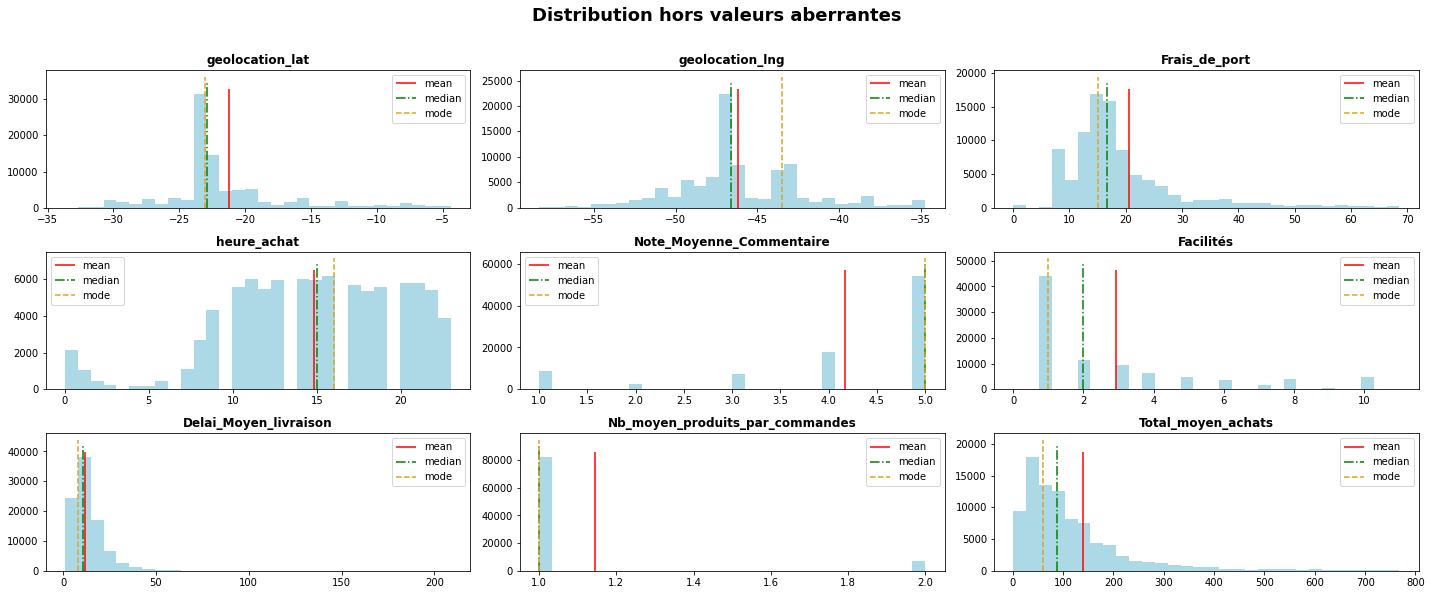

In [74]:
# Filter on numeric columns
numerical_features = final_data.select_dtypes(include='number').columns

# Plot histograms (including outliers)
fonction.plot_histograms(final_data, numerical_features, bins=30,
                figsize=(20, 10), color='lightgrey',
                skip_outliers=False, z_thresh=3,
                layout=((round(len(numerical_features)//3, 0)+1, 3)))


# Plot histograms (excluding outliers)
fonction.plot_histograms(final_data, numerical_features, bins=30,
                figsize=(20, 10), color='lightblue',
                skip_outliers=True, z_thresh=3,
                layout=((round(len(numerical_features)//3, 0)+1, 3)))

Comme les valeurs aberrantes peuvent représenter un profil client spécifique, nous ne les excluons pas à ce stade.

In [75]:
print('taille du jeu de données pré-nettoyage outliers : ', final_data.shape)
#final_data = clean_outliers(final_data)
print('taille du jeu de données post-nettoyage outliers : ', final_data.shape)

taille du jeu de données pré-nettoyage outliers :  (91233, 17)
taille du jeu de données post-nettoyage outliers :  (91233, 17)


## <center><font color=darkRed>3 - Exploration </font></center>

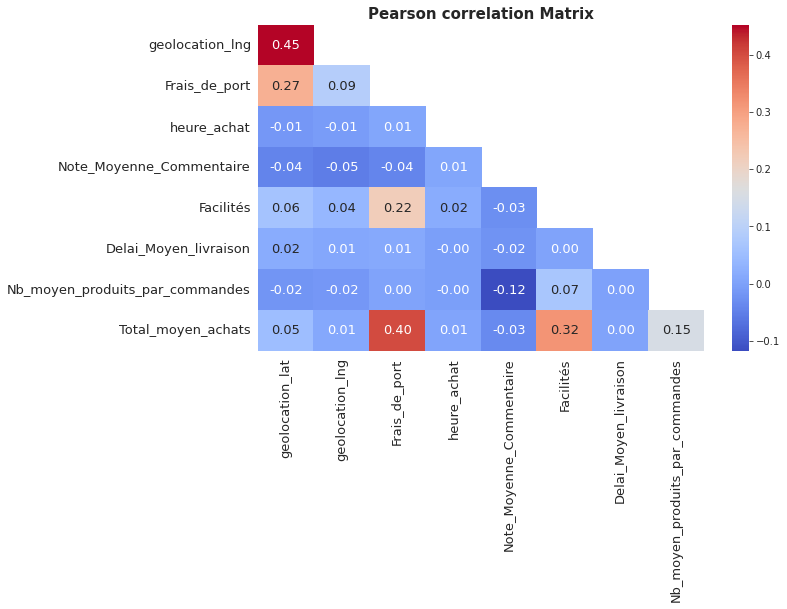

In [76]:
# Call function to plot correlation heatmap
pearson_corr_heatmap(final_data, mask_upper=True,
                     figsize=(10, 6),
                     font=13, cmap='coolwarm')

- Les frais de port, les moyens de paiement et le nombre de produits par commande sont corrélés au montant des achats
- Les frais de port sont corrélés avec la localisation des clients 

## <center><font color=darkRed>3.1 - Informations jeu de données initial</font></center>

### <center><font color=darkBlue>3.1.1 - Historique initial</font></center>

In [77]:
orders['date_achat'].max()

Timestamp('2018-08-29 15:00:37')

In [78]:
orders['date_achat'].min()

Timestamp('2016-09-15 12:16:38')

On a 2 années d'historique : de septembre 2016 à octobre 2018

### <center><font color=darkBlue>3.1.2 - Nombre de clients</font></center>

In [79]:
customers['customer_unique_id'].nunique()

96096

### <center><font color=darkBlue>3.1.3 - Nombre de transactions</font></center>

In [80]:
orders['order_id'].nunique()

96478

On a presque autant de clients que de transactions => peu de clients ont fait plus d'une transaction.

### <center><font color=darkBlue>3.1.4 - Nombre de vendeurs</font></center>

In [81]:
order_items['seller_id'].nunique()

3095

### <center><font color=darkBlue>3.1.5 - Nombre de produits</font></center>

In [82]:
order_items['product_id'].nunique()

32951

### <center><font color=darkBlue>3.1.6 - Nombre de produits par vendeur</font></center>

In [83]:
produits_par_vendeur = pd.merge(order_items, order_items).groupby(
    ['seller_id','product_id']).count().reset_index().groupby(
    'seller_id').count()['product_id'].sum()
produits_par_vendeur

34448

### <center><font color=darkBlue>3.1.7 - Région avec le plus de clients</font></center>

In [84]:
region = final_data.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
region

customer_state
SP    38412
RJ    11604
MG    10764
RS     5072
PR     4668
SC     3367
BA     3085
ES     1883
GO     1830
DF     1821
Name: customer_city, dtype: int64

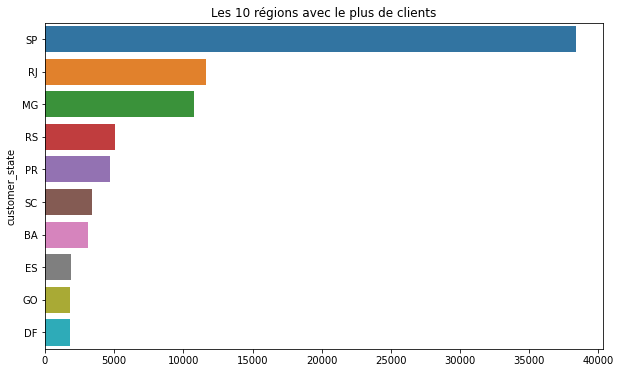

In [85]:
region = final_data.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 régions avec le plus de clients')
sns.barplot(x = region.values,
           y = region.index)

### <center><font color=darkBlue>3.1.8 - Villes avec le plus de clients</font></center>

In [86]:
villes = final_data.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
villes

customer_city
sao paulo                14206
rio de janeiro            6194
belo horizonte            2541
brasilia                  1815
curitiba                  1412
campinas                  1337
porto alegre              1268
salvador                  1118
guarulhos                 1086
sao bernardo do campo      864
Name: customer_state, dtype: int64

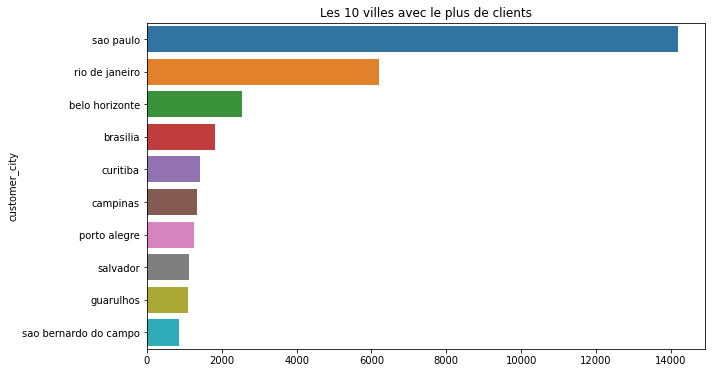

In [87]:
villes = final_data.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 villes avec le plus de clients')
sns.barplot(x = villes.values,
           y = villes.index)

### <center><font color=darkBlue>3.1.9 - Catégories les plus achetées</font></center>


In [88]:
final_data['categorie_la_plus_achetee']

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2             home
0000b849f77a49e4a4ce2b2a4ca5be3f    health_beauty
0000f46a3911fa3c0805444483337064           office
0000f6ccb0745a6a4b88665a16c9f078      electronics
0004aac84e0df4da2b147fca70cf8255      electronics
                                        ...      
fffcf5a5ff07b0908bd4e2dbc735a684    health_beauty
fffea47cd6d3cc0a88bd621562a9d061    health_beauty
ffff371b4d645b6ecea244b27531430a             auto
ffff5962728ec6157033ef9805bacc48          fashion
ffffd2657e2aad2907e67c3e9daecbeb    health_beauty
Name: categorie_la_plus_achetee, Length: 91233, dtype: object

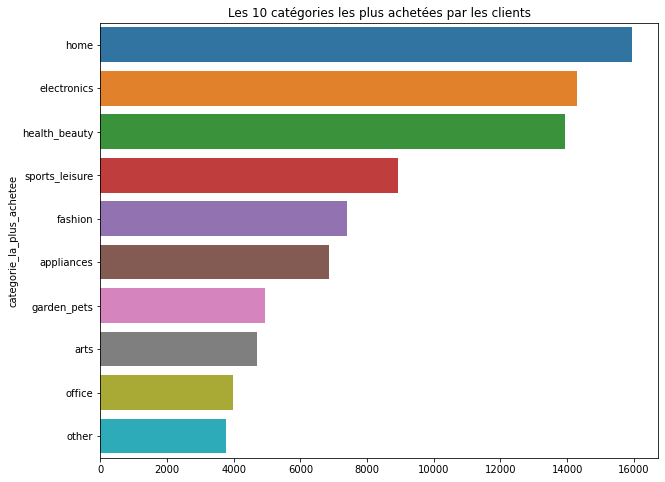

In [89]:
categories = final_data.groupby(['categorie_la_plus_achetee']).count()[
    'customer_city'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.title('Les 10 catégories les plus achetées par les clients')
sns.barplot(x = categories.values,
           y = categories.index)

### <center><font color=darkBlue>3.1.10 - Moyen de paiement les plus utilisées</font></center>

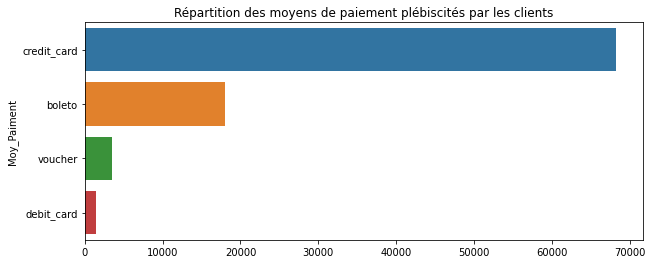

In [90]:
paiement = final_data.groupby(['Moy_Paiment']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Répartition des moyens de paiement plébiscités par les clients')
sns.barplot(x = paiement.values,
           y = paiement.index)

### <center><font color=darkBlue>3.1.11 - Visualisations des clients sur la carte</font></center>

In [92]:
geol = final_data[['geolocation_lat','geolocation_lng']]

In [93]:
geol

,geolocation_lat,geolocation_lng
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,-23.340262,-46.831085
0000b849f77a49e4a4ce2b2a4ca5be3f,-23.559044,-46.788516
0000f46a3911fa3c0805444483337064,-27.543010,-48.634938
0000f6ccb0745a6a4b88665a16c9f078,-1.312726,-48.482748
0004aac84e0df4da2b147fca70cf8255,-23.505588,-47.469820
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,-8.362654,-36.562103
fffea47cd6d3cc0a88bd621562a9d061,-12.217900,-38.959237
ffff371b4d645b6ecea244b27531430a,-11.834705,-55.508145


In [95]:
'''
import folium

m = folium.Map(location=[-15.7797200, -47.9297200], zoom_start=6)
#folium.Marker([geol['geolocation_lat'], geol['geolocation_lng']]).add_to(m)

for i in range(0,len(geol)):    
    folium.Marker([geol.iloc[i]['geolocation_lat'], geol.iloc[i]['geolocation_lng']]).add_to(m)

for i in range(0,len(geol)):
    folium.Marker(
        location = [geol.iloc[i]['geolocation_lat'], geol.iloc[i]['geolocation_lng']],
        icon = folium.Icon(icon_color="white")
        ).add_to(m)

# Création des limites de zoom de la carte
sud_ouest = geol[["geolocation_lat","geolocation_lng"]].min().values.tolist()
nord_est = geol[["geolocation_lat","geolocation_lng"]].max().values.tolist()

# Appel du zoom maximum possible
m.fit_bounds([sud_ouest,nord_est])

# Appel de la carte
m
'''

'\nimport folium\n\nm = folium.Map(location=[-15.7797200, -47.9297200], zoom_start=6)\n#folium.Marker([geol[\'geolocation_lat\'], geol[\'geolocation_lng\']]).add_to(m)\n\nfor i in range(0,len(geol)):    \n    folium.Marker([geol.iloc[i][\'geolocation_lat\'], geol.iloc[i][\'geolocation_lng\']]).add_to(m)\n\nfor i in range(0,len(geol)):\n    folium.Marker(\n        location = [geol.iloc[i][\'geolocation_lat\'], geol.iloc[i][\'geolocation_lng\']],\n        icon = folium.Icon(icon_color="white")\n        ).add_to(m)\n\n# Création des limites de zoom de la carte\nsud_ouest = geol[["geolocation_lat","geolocation_lng"]].min().values.tolist()\nnord_est = geol[["geolocation_lat","geolocation_lng"]].max().values.tolist()\n\n# Appel du zoom maximum possible\nm.fit_bounds([sud_ouest,nord_est])\n\n# Appel de la carte\nm\n'

In [96]:
'''
from mpl_toolkits.basemap import Basemap

# A basic map

m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
plt.figure(figsize=(30,15))
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
m.plot(geolocation['geolocation_lat'], geolocation['geolocation_lng'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
'''

'\nfrom mpl_toolkits.basemap import Basemap\n\n# A basic map\n\nm=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)\nplt.figure(figsize=(30,15))\nm.drawmapboundary(fill_color=\'#A6CAE0\', linewidth=0)\nm.fillcontinents(color=\'grey\', alpha=0.7, lake_color=\'grey\')\nm.drawcoastlines(linewidth=0.1, color="white")\nm.plot(geolocation[\'geolocation_lat\'], geolocation[\'geolocation_lng\'], linestyle=\'none\', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)\n'

## <center><font color=darkRed>4 - Conclusions sur l'analyse des distributions des variables</font></center>

- Il y a **96.096 clients** pour **96.478 transaction**;
- **90 %** des clients ont fait un achat unique;
- **10 %** des clients ont éffectuer un ré-achat;
- On denombre **3095 vendeurs**;
- Le nombres de produits par vendeur est en moyenne de **34.448 produits**;
- **La carte bancaire** et le moyen de paiement le plus utilisé;
- Les villes de **sao paulo** et **rio de janeiro** ont le plus de clients.


## <center><font color=darkRed>5 - Export jeu de données </font></center>

In [97]:
final_data.to_csv('/content/drive/MyDrive/Openclassrooms/Projet-5/data/data_cleaned.csv')